<a href="https://colab.research.google.com/github/liliankagiri/Image-Classification-Model-/blob/main/LearningTensorflow1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image Classification Using Convolutional Neural Network**

---





Importing training and testing dataset

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2025-07-01 12:14:15--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873 [following]
--2025-07-01 12:14:16--  https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc308632902d5a7f7df93f4658c6.dl.dropboxusercontent.com/cd/0/inline/CsrQXyDJppRjNt99xYyqF3l8vEgrfm1SZ3LVsYnXHi9s3sDofzZfBOVwOdNxRH6nyJzXVjWY-1aM3GKy4kifjA9-su0oqBATIhcs4VoXweM-JUW6znTXs1UCPHOQgUbgct_5o-PMnXp9VQ3cSOan0Qs-/file# [following]
--2025-07-01 12:14:16--  https://uc308632902d5a7f7df93f4658c6.dl.dropboxusercontent.com/c

Unzipping the compressed data

In [ ]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Activation, Dropout
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Checking Tensorflow version

In [ ]:
print(tensorflow.__version__)

2.18.0


Parameters initialization

In [ ]:
img_width, img_height = 150, 150       # Purpose: Set the target size for all input images to 150x150 pixels (width x height)
train_data_dir = r"/content/training_set/training_set"     # Purpose: Define the path to the training dataset
validation_data_dir = r"/content/test_set/test_set"     # Purpose: Define the path to the validation dataset
nb_train_samples = 100    #Set the number of training samples to be used
nb_validation_samples = 100     # Purpose: Set the number of validation samples to be used for evaluation

epochs = 20       # Purpose: Number of times the model will go through the entire training dataset
batch_size = 20    # Purpose: Number of images processed together before updating model weights (smaller batches = more updates per epoch)


Checking shapes of the images

image data is presented in a 3D array.[rows][cols][channels] in a channel last representation. Channels are the first dimension in channel first representation.

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format() == 'channels_first' :
  input_shape = (3, img_width, img_height)

else:

  input_shape = (img_width, img_height, 3)    # the 3 is for RGB imaging.To say that the images are multicoloured and not greyscale(black and white)

Setting up data generators for training and validation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to be between 0 and 1
    shear_range=0.2,         # Apply random shearing transformations
    zoom_range=0.2,          # Apply random zooming transformations
    horizontal_flip=True)    # Randomly flip images horizontally

test_datagen = ImageDataGenerator(rescale=1./255) # Only rescale for test data

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),  # Resize images to the target size
    batch_size=batch_size,                # Set the batch size
    class_mode='binary')                  # Use binary crossentropy loss

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Representation of image data generator

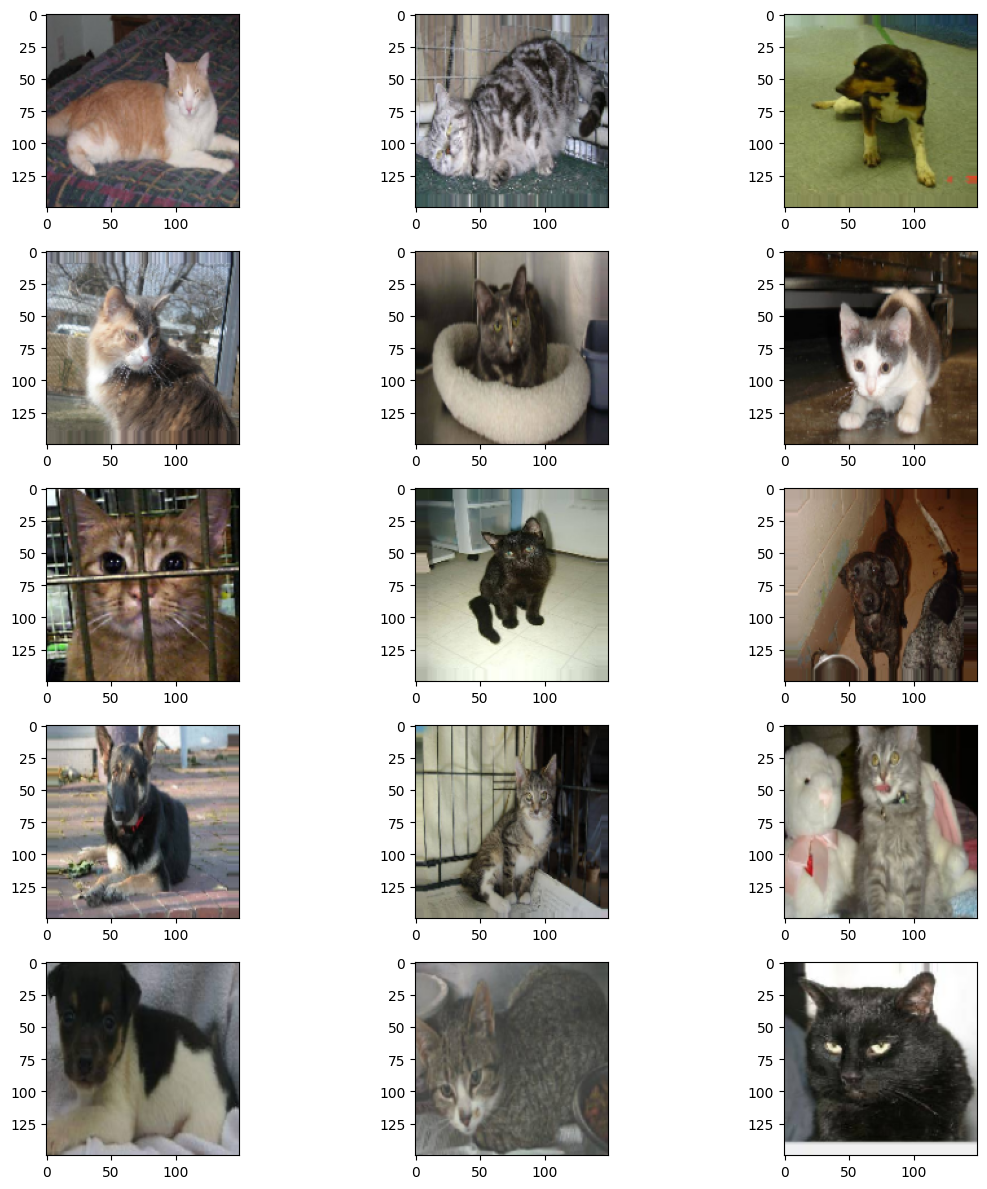

In [ ]:
plt.figure(figsize=(12,12))
for i in range (0,15):
  plt.subplot(5,3,i+1)
  for x_batch, y_batch in train_generator:
    image=x_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

Building the CNN model

In [ ]:
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=input_shape))    # 64 neurons using 3*3 filter

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # Pooling reduces the size of the data



    model.add(Flatten())    # convertion of multidimentional array to 1D
    model.add(Dense(64))

    model.add(Activation('relu'))
    model.add(Dense(1))             # Output layer
    model.add(Activation('sigmoid'))
    model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 350464)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    22,429,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

Model Compilation

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])   # Optimization algorithm — controls how weights update during training
               # Loss function for binary classification (2 classes, e.g., cats vs dogs)
                # Track and report accuracy after each epoch


model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 350464)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    22,429,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

Model Fitting

In [ ]:
training = model.fit(train_generator, steps_per_epoch = nb_train_samples,epochs = epochs,validation_data = validation_generator,validation_steps = nb_validation_samples)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5008 - loss: 6.7424

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.5012 - loss: 6.6996 - val_accuracy: 0.6280 - val_loss: 0.6401
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.6056 - loss: 0.6649 - val_accuracy: 0.6380 - val_loss: 0.6308
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.6285 - loss: 0.6502 - val_accuracy: 0.6770 - val_loss: 0.5933
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.6454 - loss: 0.6364 - val_accuracy: 0.6620 - val_loss: 0.6203
Epoch 5/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6500 - loss: 0.5599

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6500 - loss: 0.5599 - val_accuracy: 0.6930 - val_loss: 0.5835
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.6579 - loss: 0.6189 - val_accuracy: 0.6810 - val_loss: 0.5917
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.6798 - loss: 0.6194 - val_accuracy: 0.6975 - val_loss: 0.5830
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.6788 - loss: 0.6250 - val_accuracy: 0.7135 - val_loss: 0.5538
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.6780 - loss: 0.5955 - val_accuracy: 0.7155 - val_loss: 0.5650
Epoch 10/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6500 - loss: 0.6103

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6500 - loss: 0.6103 - val_accuracy: 0.6955 - val_loss: 0.5880
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.7013 - loss: 0.5860 - val_accuracy: 0.6650 - val_loss: 0.6385
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - accuracy: 0.6764 - loss: 0.5951 - val_accuracy: 0.6705 - val_loss: 0.6049
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.7017 - loss: 0.5704 - val_accuracy: 0.7365 - val_loss: 0.5347
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.7069 - loss: 0.5667 - val_accuracy: 0.7250 - val_loss: 0.5497
Epoch 15/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9000 - loss: 0.3342

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9000 - loss: 0.3342 - val_accuracy: 0.7285 - val_loss: 0.5525
Epoch 16/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - accuracy: 0.7049 - loss: 0.5546 - val_accuracy: 0.7150 - val_loss: 0.5656
Epoch 17/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.6978 - loss: 0.5814 - val_accuracy: 0.7020 - val_loss: 0.6215
Epoch 18/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.7129 - loss: 0.5606 - val_accuracy: 0.7225 - val_loss: 0.6035
Epoch 19/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.7281 - loss: 0.5522 - val_accuracy: 0.7245 - val_loss: 0.5314
Epoch 20/20
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7500 - loss: 0.4112

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7500 - loss: 0.4112 - val_accuracy: 0.7275 - val_loss: 0.5287


Finding model accuracy

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


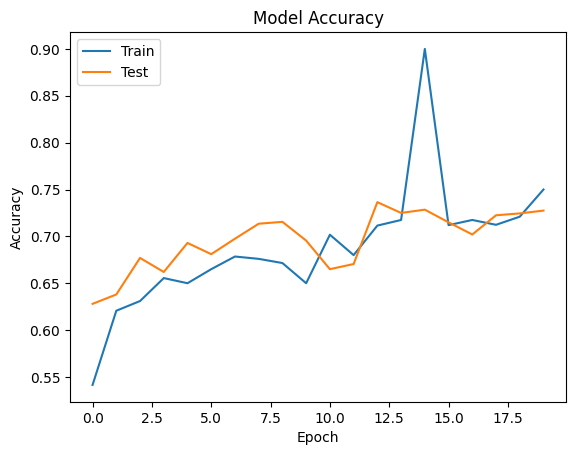

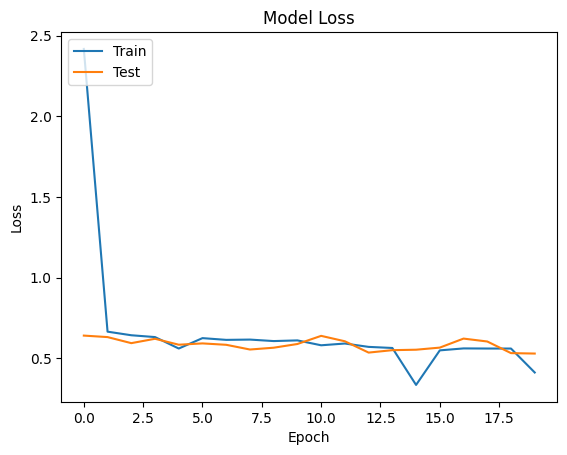

In [ ]:

import matplotlib.pyplot as plt
%matplotlib Inline

print(training.history.keys())

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Image Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1.]]
prediction: dog


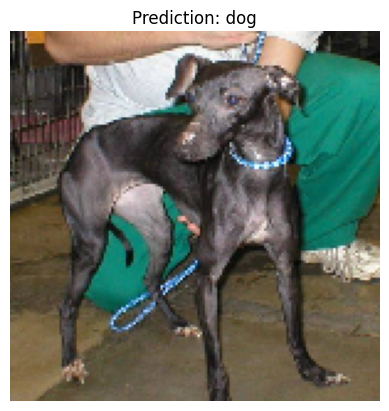

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img('/content/test_set/test_set/dogs/dog.4004.jpg', target_size=(150, 150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

result = model.predict(img_pred)
print(result)
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

print('prediction:',prediction)

plt.imshow(img_pred[0].astype("uint8"))
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()

## Trying out out model prediction from an external source image

Saving my_cat.jpeg to my_cat (7).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


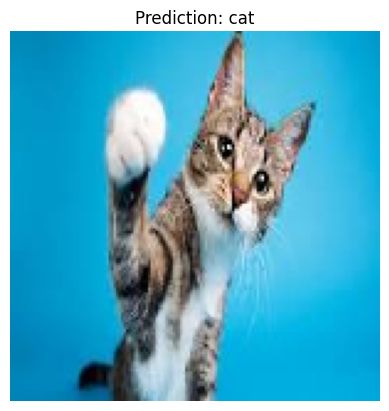

In [ ]:
from google.colab import files
uploaded = files.upload()


img_path = 'my_cat.jpeg'

# Load and prepare the image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Predict
result = model.predict(img_array)
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'


# Show image and prediction
plt.imshow(img)
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()

